In [1]:
import os, glob
import numpy as np
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions

from imageNet_model import ImageNet_model
from attack_methods import simpleEA, CMA_ES

Using TensorFlow backend.
C:\Users\ASUS\Anaconda3\envs\py3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


In [2]:
# use GPU for evalutaing fitness values
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
# load target model
inceptionv3 = InceptionV3()
target_model = ImageNet_model(model=inceptionv3, preprocess_input=preprocess_input, decode_predictions=decode_predictions)

In [4]:
# load data
with open('ImageNet_test_0-1000.npy', 'rb') as f:
    X_test = np.load(f)
    
y_test = []
original_preds = target_model.predict(X_test)
for pred in original_preds:
    y_test.append(pred.argsort()[-5:][::-1])
y_test = np.array(y_test)

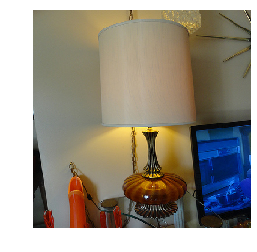

table_lamp  0.8651884198188782
lampshade  0.13480712473392487
spotlight  2.9675825885533413e-07
quilt  2.7322960249875905e-07
quail  2.305590385276446e-07


In [5]:
target_img_idx = 16
target_model.predict_and_show(X_test[target_img_idx])

In [6]:
cma_es = CMA_ES(target_model=target_model, target_img=X_test[target_img_idx])

In [7]:
simple_ea = simpleEA(target_model=target_model, target_img=X_test[target_img_idx])

C:\Users\ASUS\Anaconda3\envs\py3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\ASUS\Anaconda3\envs\py3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [8]:
cma_es.evol(max_gen=200, sigma=0.1, verbose=True)

gen	nevals	avg     	std    	min     	max     
1  	18    	-14.9328	0.71076	-16.5691	-13.8069
2  	18    	-14.7834	0.456252	-15.5815	-13.809 
3  	18    	-14.7335	0.766272	-16.4356	-13.6908
4  	18    	-14.3583	1.10254 	-16.5719	-12.4741
5  	18    	-14.1511	0.745594	-15.5837	-12.8838
6  	18    	-13.6999	0.975704	-15.5816	-11.5534
7  	18    	-13.5913	1.00884 	-15.4308	-11.5073
8  	18    	-13.8808	1.19599 	-15.4931	-11.3704
9  	18    	-12.7573	1.0241  	-14.99  	-11.2591
10 	18    	-12.5724	1.01772 	-13.9252	-10.7276
11 	18    	-11.9918	0.95995 	-14.041 	-10.6369
12 	18    	-11.6038	0.987665	-13.4617	-9.88302
13 	18    	-11.8849	1.15027 	-13.8012	-9.92272
14 	18    	-11.5623	1.13584 	-13.7864	-9.42512
15 	18    	-10.6581	1.08777 	-14.0415	-8.55514
16 	18    	-10.0001	1.17165 	-12.1607	-8.25718
17 	18    	-9.84542	0.966903	-11.5209	-8.26009
18 	18    	-9.93657	1.3754  	-12.7782	-7.29022
19 	18    	-9.54242	0.614309	-10.7278	-7.97224
20 	18    	-9.33832	0.588021	-10.2778	-7.92121
21 	18    	-9.5

60

In [9]:
simple_ea.evol(num_gen=200, verbose=True)

avg     	gen	max     	min     	nevals	std     
-14.2995	1  	-13.8136	-14.6122	9     	0.353076
-14.0365	2  	-13.4715	-14.578 	9     	0.46353 
-13.5779	3  	-12.991 	-14.2701	9     	0.450639
-13.4177	4  	-12.991 	-13.7611	9     	0.269821
-13.2232	5  	-12.6269	-13.6382	9     	0.345705
-12.771 	6  	-12.4443	-13.1548	9     	0.254892
-12.536 	7  	-12.3179	-12.7789	9     	0.137999
-12.4624	8  	-12.1508	-12.887 	9     	0.189483
-12.4516	9  	-12.256 	-13.1582	9     	0.273135
-12.0463	10 	-11.5919	-13.2295	9     	0.551692
-11.8291	11 	-11.5919	-12.2669	9     	0.233871
-11.6354	12 	-11.1975	-12.0598	9     	0.349253
-11.3175	13 	-10.8501	-11.7664	9     	0.357811
-10.9917	14 	-10.6963	-12.056 	9     	0.413348
-10.5745	15 	-10.3941	-10.8501	9     	0.175321
-10.4723	16 	-10.1457	-10.8501	9     	0.188655
-10.4556	17 	-10.2526	-10.876 	9     	0.18198 
-10.3727	18 	-10.2084	-10.5971	9     	0.135774
-10.3932	19 	-9.99194	-10.991 	9     	0.300656
-10.3908	20 	-10.182 	-10.6143	9     	0.161953
-10.4592	21 	

159

Original image:


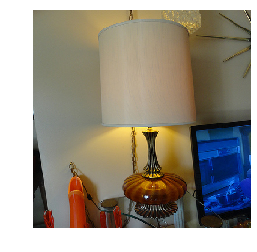

table_lamp  0.8651884198188782
lampshade  0.13480712473392487
spotlight  2.9675825885533413e-07
quilt  2.7322960249875905e-07
quail  2.305590385276446e-07

Perturbed image by CMA-ES:


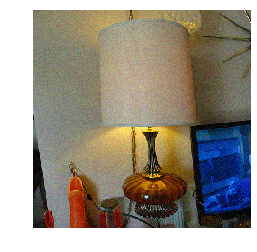

chime  0.691209614276886
lampshade  0.23725642263889313
table_lamp  0.06996998935937881
bell_cote  0.0010062522487714887
space_shuttle  0.00010366531205363572

Perturbed image by GA:


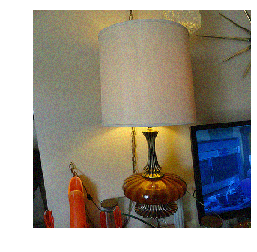

chime  0.46697983145713806
lampshade  0.434436172246933
table_lamp  0.09776879101991653
bell_cote  0.0006986366934143007
space_shuttle  2.3352473363047466e-05


In [10]:
print("Original image:")
target_model.predict_and_show(X_test[target_img_idx])
print("\nPerturbed image by CMA-ES:")
target_model.predict_and_show(cma_es.add_adv(cma_es.get_adv(cma_es.hof[0])))
print("\nPerturbed image by GA:")
target_model.predict_and_show(simple_ea.add_adv(simple_ea.hof[0]))